In [1]:
import pandas as pd
import numpy as np

In [2]:
data= ('/content/drive/MyDrive/Python/Unemployment_trend_analysis/P_Data_Extract_From_World_Development_Indicators (2).xlsx')

In [3]:
df = pd.read_excel(data)
df.head()

,Country Name,Country Code,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,8.082,8.070,8.054,8.040,8.186,8.122,8.053,8.113,...,7.949,7.91,8.989,10.086,11.180,11.110,11.085,11.710,0.000,0.000
1,Albania,ALB,20.047,20.840,19.028,18.575,17.895,16.989,16.310,15.970,...,15.870,18.05,17.190,15.420,13.620,12.300,11.470,13.067,12.683,11.808
2,Algeria,DZA,26.640,28.304,29.770,27.300,25.900,23.720,17.650,15.270,...,9.820,10.21,11.210,10.200,10.334,10.416,10.495,12.248,11.747,11.550
3,Angola,AGO,4.234,4.206,4.163,4.119,4.043,4.043,3.972,3.915,...,8.834,9.58,9.584,9.586,9.535,9.522,9.481,10.350,10.384,10.209
4,Argentina,ARG,12.650,14.050,15.000,17.320,19.590,15.360,13.520,11.510,...,7.100,7.27,7.524,8.109,8.350,9.220,9.840,11.460,8.740,6.491


In [4]:
df.dtypes

,0
Country Name,object
Country Code,object
1998,float64
1999,float64
2000,float64
2001,float64
2002,float64
2003,float64
2004,float64
2005,float64


In [5]:
df.isnull().sum()

,0
Country Name,0
Country Code,0
1998,0
1999,0
2000,0
2001,0
2002,0
2003,0
2004,0
2005,0


average global unemployment rate for 2021

In [6]:
avg_unemployment_2021 = df['2021'].mean()
print(f"Average Global Unemployment Rate for 2021: {round(avg_unemployment_2021,2)}")

Average Global Unemployment Rate for 2021: 7.94


country with the highest unemployment rate in 2021

In [7]:
# Now the rest of your code should work
country_highest_unemployment_2021 = df.loc[df['2021'].idxmax(), 'Country Name']
highest_unemployment_rate_2021 = df['2021'].max()
print(f"Country with highest unemployment rate in 2021: {country_highest_unemployment_2021} ({highest_unemployment_rate_2021})")

Country with highest unemployment rate in 2021: South Africa (28.77)


Plot a line graph showing the change in global average unemployment rate from 1991 to 2021.

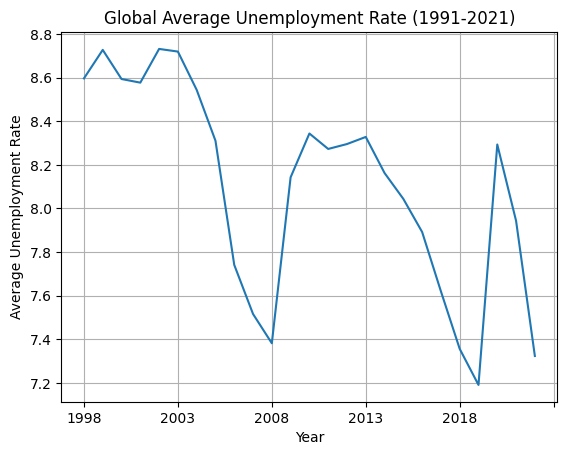

In [8]:
import matplotlib.pyplot as plt
global_avg_unemployment = df.iloc[:, 2:].mean()
global_avg_unemployment.plot(kind='line', title='Global Average Unemployment Rate (1991-2021)')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate')
plt.grid(True)
plt.show()


country with the most significant reduction in unemployment over the last decade.

In [9]:
df['unemployment_reduction'] = df['1998'] - df['2018']
country_max_reduction = df.loc[df['unemployment_reduction'].idxmax(), 'Country Name']
max_reduction = df['unemployment_reduction'].max()
print(f"Country with the most significant reduction in unemployment from 2011 to 2021: {country_max_reduction} ({max_reduction})")


Country with the most significant reduction in unemployment from 2011 to 2021: Algeria (16.224)


Analyze the impact of the 2008 financial crisis on global unemployment rates

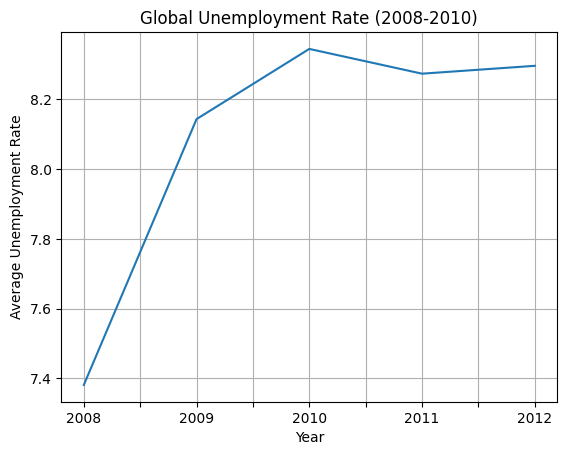

In [10]:
financial_crisis_years = df[['2008', '2009', '2010','2011','2012']].mean()
financial_crisis_years.plot(kind='line', title='Global Unemployment Rate (2008-2010)')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate')
plt.grid(True)
plt.show()

 Effect of the COVID-19 pandemic on unemployment rates in 2020 and 2021

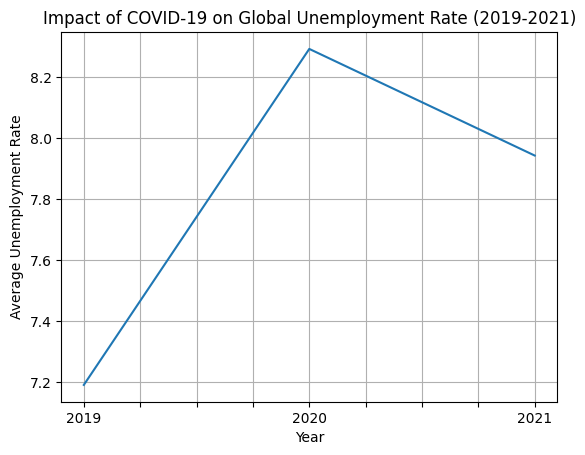

In [11]:
covid_years = df[['2019', '2020', '2021']].mean()
covid_years.plot(kind='line', title='Impact of COVID-19 on Global Unemployment Rate (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate')
plt.grid(True)
plt.show()

top 5 countries with the lowest average unemployment rate from 1991 to 2021

In [12]:
df['avg_unemployment'] = df.iloc[:, 2:].mean(axis=1)
top_5_lowest_unemployment = df[['Country Name', 'avg_unemployment']].sort_values('avg_unemployment').head(5)
print(top_5_lowest_unemployment)


    Country Name  avg_unemployment
136        Qatar          0.483462
115      Myanmar          0.666692
27      Cambodia          0.712077
31          Chad          0.961692
10       Bahrain          1.144000


 outliers in the dataset for any country

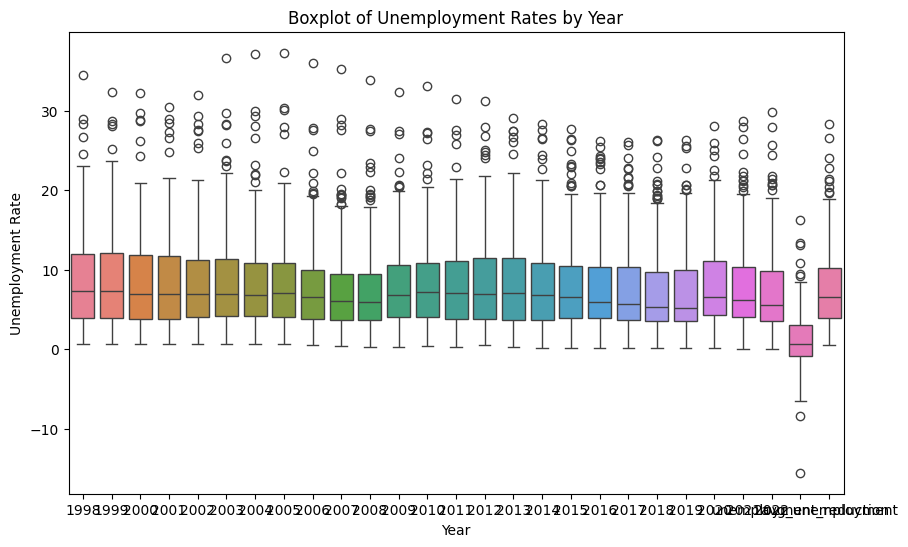

In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:, 2:])
plt.title('Boxplot of Unemployment Rates by Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()


Look into it: Region with the most stable employment market

In [14]:
region_std_devs = df.iloc[:, 3:].std()
stable_region = region_std_devs.idxmin()
print(f"The region with the most stable employment market: {stable_region}")


The region with the most stable employment market: unemployment_reduction


Histogram of 2021 unemployment rates

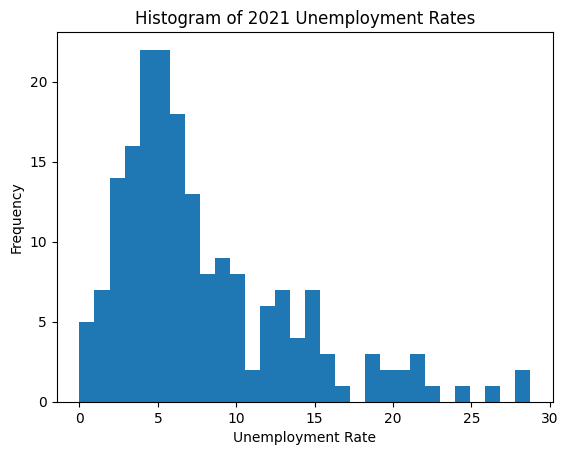

In [15]:
df['2021'].plot(kind='hist', bins=30, title='Histogram of 2021 Unemployment Rates')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()


 Time-series analysis and forecast unemployment rates for a selected country for the next two years.


In [16]:
"""
from statsmodels.tsa.holtwinters import ExponentialSmoothing
country_data = df[df['Country Name'] == 'United States'].iloc[:, 2:].transpose()
country_data.columns = ['Unemployment Rate']
country_data.index = pd.to_datetime(country_data.index, format='%Y')

model = ExponentialSmoothing(country_data['Unemployment Rate'], trend='add', seasonal=None)
model_fit = model.fit()
forecast = model_fit.forecast(steps=2)
print(f"Forecast for the next two years: {forecast}")
"""


'\nfrom statsmodels.tsa.holtwinters import ExponentialSmoothing\ncountry_data = df[df[\'Country Name\'] == \'United States\'].iloc[:, 2:].transpose()\ncountry_data.columns = [\'Unemployment Rate\']\ncountry_data.index = pd.to_datetime(country_data.index, format=\'%Y\')\n\nmodel = ExponentialSmoothing(country_data[\'Unemployment Rate\'], trend=\'add\', seasonal=None)\nmodel_fit = model.fit()\nforecast = model_fit.forecast(steps=2)\nprint(f"Forecast for the next two years: {forecast}")\n'

Building a regression model to predict unemployment rates

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Remove rows with missing values for simplicity
df = df.dropna()

# Set 'Country Name' as the index
df = df.set_index('Country Code')

# Independent Variables (Features): Data from 1998 to 2021
X = df.loc[:, '1998':'2021']

# Dependent Variable (Target): Data for the year 2022
y = df['2022']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

##R-squared: 86.37% (86.37% of the variability observed in the target variable is
# explained by the regression model)

Mean Squared Error: 2.851084788232949
R-squared: 0.8637062666841375


Graph for predicted versus actual values

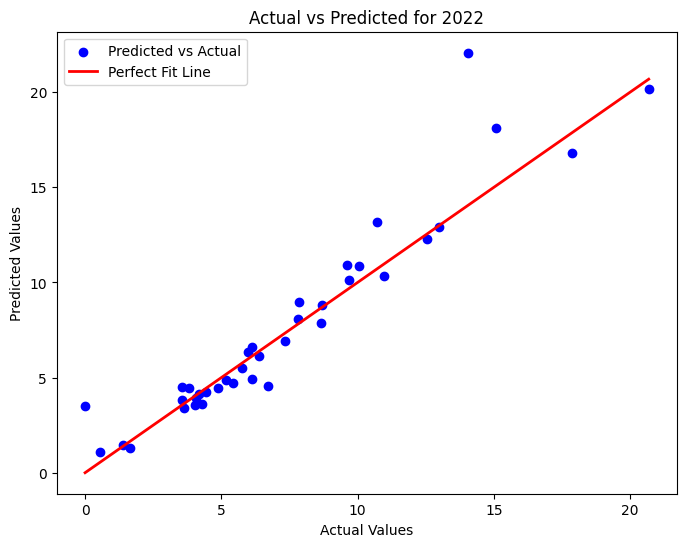

In [24]:
# Plotting the regression model
# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Fit Line')
plt.title('Actual vs Predicted for 2022')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Classification Model

In [43]:
df1= pd.read_excel(data)
df1.head()

,Country Name,Country Code,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,8.082,8.070,8.054,8.040,8.186,8.122,8.053,8.113,...,7.949,7.91,8.989,10.086,11.180,11.110,11.085,11.710,0.000,0.000
1,Albania,ALB,20.047,20.840,19.028,18.575,17.895,16.989,16.310,15.970,...,15.870,18.05,17.190,15.420,13.620,12.300,11.470,13.067,12.683,11.808
2,Algeria,DZA,26.640,28.304,29.770,27.300,25.900,23.720,17.650,15.270,...,9.820,10.21,11.210,10.200,10.334,10.416,10.495,12.248,11.747,11.550
3,Angola,AGO,4.234,4.206,4.163,4.119,4.043,4.043,3.972,3.915,...,8.834,9.58,9.584,9.586,9.535,9.522,9.481,10.350,10.384,10.209
4,Argentina,ARG,12.650,14.050,15.000,17.320,19.590,15.360,13.520,11.510,...,7.100,7.27,7.524,8.109,8.350,9.220,9.840,11.460,8.740,6.491


In [38]:
# Re-importing required libraries and setting up the process after the environment reset

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Remove rows with missing values for simplicity
df1 = df1.dropna()

# Set 'Country Name' as the index
df1 = df1.set_index('Country Name')

# Define the new threshold for high unemployment (8% in this case)
unemployment_threshold = 8  # Unemployment rate above 8% is high risk

# Create a binary target variable (1 for high unemployment, 0 for low unemployment)
y = (df1['2022'] > unemployment_threshold).astype(int)

# Independent Variables (Features): Data from 1998 to 2021
X = df1.loc[:, '1998':'2021']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest using GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=5, n_jobs=-1, verbose=2)

# Fit the Random Forest model with hyperparameter tuning
rf_grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(rf_grid_search.best_params_)

# Predict using the best Random Forest model
rf_pred = rf_grid_search.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print("Classification Report:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

# Hyperparameter tuning for SVM using GridSearchCV
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4, 5]  # Only used when kernel='poly'
}

svm_grid_search = GridSearchCV(estimator=SVC(random_state=42),
                               param_grid=svm_param_grid,
                               cv=5, n_jobs=-1, verbose=2)

# Fit the SVM model with hyperparameter tuning
svm_grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("\nBest Hyperparameters for SVM:")
print(svm_grid_search.best_params_)

# Predict using the best SVM model
svm_pred = svm_grid_search.predict(X_test)

# Evaluate the SVM model
print("\nSVM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print("Classification Report:")
print(classification_report(y_test, svm_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best Hyperparameters for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest Model Evaluation:
Accuracy: 0.9210526315789473
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.90      0.91        38
weighted avg       0.92      0.92      0.92        38

Confusion Matrix:
[[24  1]
 [ 2 11]]
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Hyperparameters for SVM:
{'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}

SVM Model Evaluation:
Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.92      0.92      0.92        13

    acc

Cluster Analysis using K-means

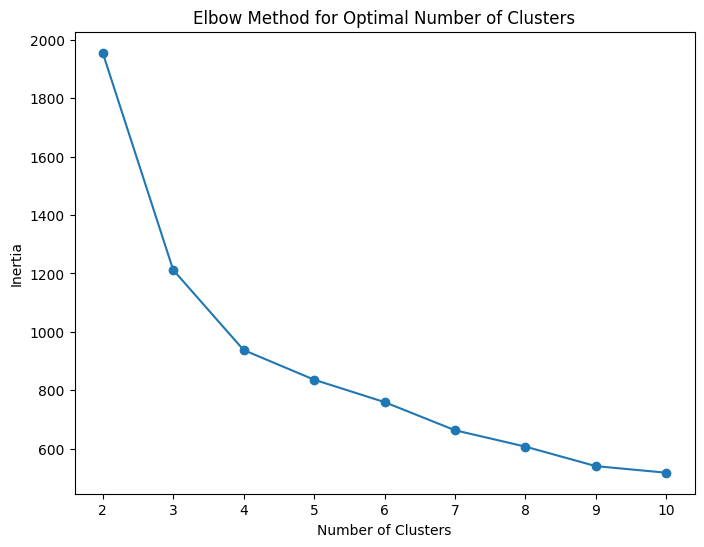

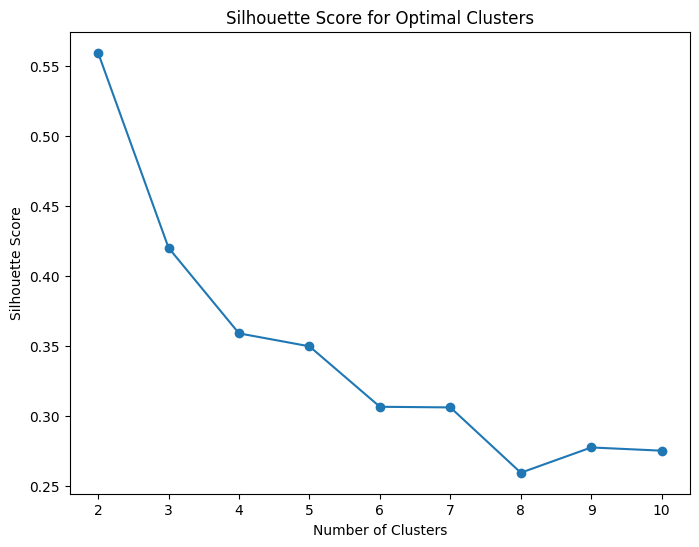

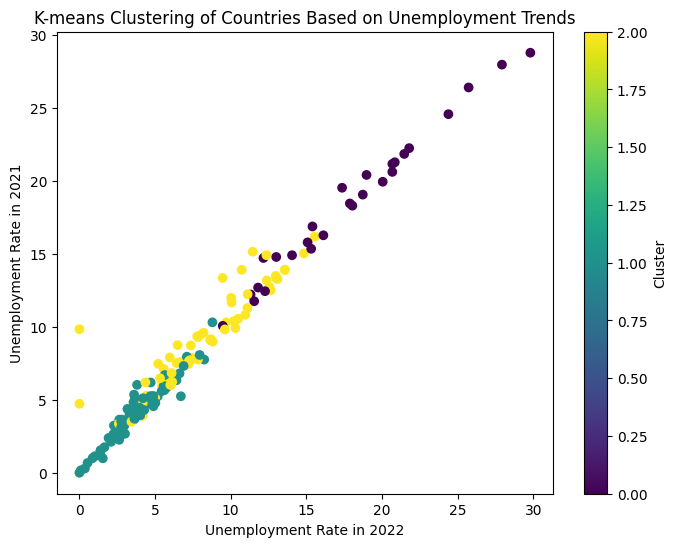


Countries in Cluster 0:
['Albania', 'Algeria', 'Bosnia and Herzegovina', 'Botswana', 'Congo, Rep.', 'Djibouti', 'Eswatini', 'Gabon', 'Georgia', 'Greece', 'Jordan', 'Lesotho', 'Libya', 'Montenegro', 'Namibia', 'New Caledonia', 'North Macedonia', 'Sao Tome and Principe', 'Serbia', 'Somalia', 'South Africa', 'Spain', 'St. Lucia', 'St. Vincent and the Grenadines', 'Sudan', 'Tunisia', 'West Bank and Gaza']

Countries in Cluster 1:
['Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Cuba', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Eritrea', 'Ethiopia', 'Fiji', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Honduras', 'Hong Kong SAR, China', 'Iceland', 'Indonesia', 'Japan', 'Kenya', "Korea, Dem. People's Rep.", 'Korea, Rep.', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Liberia', 'Luxembourg', 'Macao SAR,

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset (assuming df1 is the DataFrame with the dataset)
df1= pd.read_excel(data)
# Remove rows with missing values for simplicity
df1 = df1.dropna()

# Set 'Country Name' as the index
df1 = df1.set_index('Country Name')

# Independent Variables (Features): Unemployment data from 1998 to 2022
X = df1.loc[:, '1998':'2022']

# Normalize the data using StandardScaler (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to determine the optimal number of clusters
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Testing for 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the Elbow Method graph to visualize the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', label='Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plotting the Silhouette Scores to assess the cluster quality
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the Elbow and Silhouette methods, choose the optimal number of clusters (e.g., 3 clusters)
optimal_k = 3

# Fit K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df1['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df1['2022'], df1['2021'], c=df1['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering of Countries Based on Unemployment Trends')
plt.xlabel('Unemployment Rate in 2022')
plt.ylabel('Unemployment Rate in 2021')
plt.colorbar(label='Cluster')
plt.show()

# Print the countries in each cluster
for cluster in range(optimal_k):
    print(f"\nCountries in Cluster {cluster}:")
    print(df1[df1['Cluster'] == cluster].index.tolist())
